In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('./data/ul-pfe-ns.csv')

In [4]:
# df.columns

In [5]:
# df.head()

In [6]:
df.shape

(1972, 80)

In [7]:
# df.info()

In [8]:
X = df.drop('throughput',axis=1)

In [9]:
X.shape

(1972, 79)

In [10]:
y = df['throughput']

In [11]:
y.shape

(1972,)

In [12]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Instantiate & fit model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Err stats
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

In [13]:
mae

4.46514859175413

In [14]:
mse

31.00499472886566

In [15]:
rmse

5.568212884657488

In [16]:
err_df = pd.DataFrame(data=[mae, mse, rmse],index=['MAE','MSE','RMSE'],columns=['LR'])
err_df

,LR
MAE,4.465149
MSE,31.004995
RMSE,5.568213


In [17]:
err_df.to_csv('./test-err/lin-test-err.csv')

In [18]:
y_pred_df = pd.DataFrame(y_pred, columns=['throughput_pred'])
y_pred_df.describe().drop('count')
# negative predictions are outside the range! 

,throughput_pred
mean,18.443633
std,7.148731
min,-1.469804
25%,13.251306
50%,17.976322
75%,23.914206
max,35.412176


In [19]:
y_pred[y_pred < 0]
# model generates four negative predictions -> make predicition in two steps: (1) generate prediction with the model (2) set negative values to zero

array([-1.46980358])

In [20]:
len(y_pred[y_pred < 0])/len(y_pred_df)*100

0.15360983102918588

<AxesSubplot:ylabel='Count'>

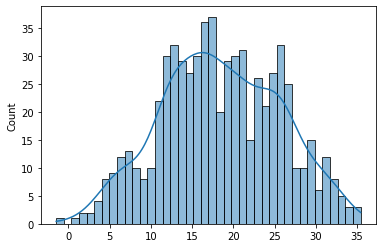

In [21]:
sns.histplot(y_pred,bins=40,kde=True)
# the predictions are distributed normally, although we noted at the beginning of the project that the throughput is not distributed normally but rather exponentially

In [22]:
# y.describe().drop(['count'])

In [23]:
res = y_test - y_pred
res.describe().drop('count')

mean    -0.277817
std      5.565554
min    -16.127050
25%     -3.909834
50%      0.122497
75%      3.738599
max     13.569418
Name: throughput, dtype: float64

<AxesSubplot:xlabel='throughput', ylabel='Count'>

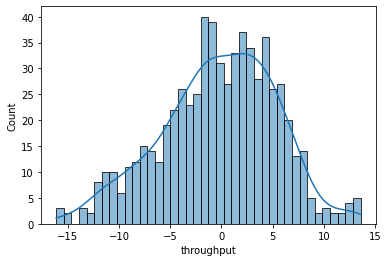

In [24]:
sns.histplot(data=res, kde=True,bins=40)

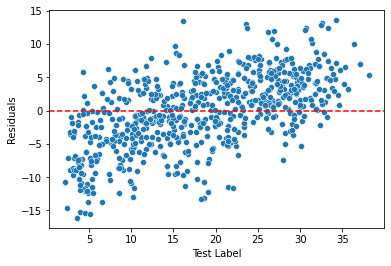

In [25]:
ax = sns.scatterplot(x=y_test, y=res)
ax.set(ylabel='Residuals', xlabel='Test Label')
plt.axhline(y=0,color='red',linestyle='--')

# there should be no clear pattern / curve in the plot
# we see a positive correlation between Test Label and Residuals -> later models should avoid this pattern

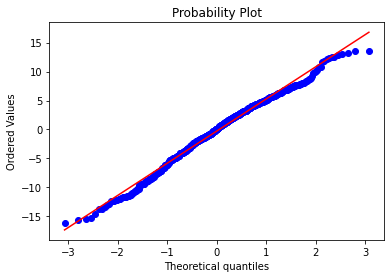

In [26]:
import scipy as sp

fig, ax = plt.subplots()
sp.stats.probplot(res,plot=ax);

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

X_lin = scaler.transform(X)

linear_model = LinearRegression()
linear_model.fit(X_lin,y)

LinearRegression()

In [28]:
# model.coef_

In [29]:
# coef_df = pd.DataFrame(data=model.coef_,index=X.columns,columns=['beta'])
# coef_df.sort_values('beta')

In [30]:
# linear_model.coef_

In [31]:
coef_df = pd.DataFrame(data=linear_model.coef_,index=X.columns,columns=['beta'])
coef_df.sort_values('beta').transpose()

,lon,ci_29391105,ta,alt,ci_26385410,hour,ci_28368386,ci_33527561,distance,ci_26385408,ci_29391106,ci_27771139,region_urban,dir,ci_33527559,ci_26385409,ci_28365058,ci_27771905,ci_27299332,rtt,ci_28365056,ci_26378755,ci_27771904,ci_28365057,ci_27771906,region_suburban,ci_26379013,ci_28371201,ci_26378754,ci_29391104,ci_27770883,ci_28367105,ci_29563904,ci_29398276,ci_26796290,ci_26796291,weekday_Wednesday,ci_27029251,ci_27770885,ci_27256325,ci_28368384,speed,weekday_Monday,ci_30422273,ci_33837570,ci_28367106,cqi,weekday_Thursday,weekday_Tuesday,ci_27771140,ci_29568769,ci_27256324,ci_33527554,ci_33519104,ci_27770888,ci_31281409,ci_30492930,acc,ci_26378498,ci_29401601,rsrq,ci_28371200,ci_31263232,sinr,region_highway,ci_27771909,ci_29913345,ci_27771908,ci_26378497,ci_29568768,ci_27771907,ci_29913344,ci_29913346,ci_28371202,ci_33527552,lat,txPower,rsrp,payload
beta,-1.576253,-1.282878,-1.124107,-1.031171,-0.925096,-0.881384,-0.851871,-0.743425,-0.729474,-0.707955,-0.668906,-0.636503,-0.626271,-0.511138,-0.505518,-0.485149,-0.475943,-0.447802,-0.436378,-0.417554,-0.411205,-0.410051,-0.402986,-0.399391,-0.397924,-0.39008,-0.301999,-0.270315,-0.264861,-0.220774,-0.167889,-0.164308,-0.159637,-0.156469,-0.129394,-0.12836,-0.122889,-0.110869,-0.036554,-0.024338,-0.006298,0.01317,0.030053,0.030243,0.0396,0.047291,0.060764,0.062227,0.066872,0.075425,0.077723,0.147137,0.167066,0.175567,0.2655,0.295862,0.383999,0.400117,0.41206,0.445528,0.455594,0.491834,0.537869,0.562549,0.568727,0.578289,0.746826,0.751305,0.773719,0.895351,0.902959,0.919832,1.03887,1.124908,1.147276,1.821222,2.464557,4.280057,5.413262


In [32]:
coef_df.describe()

,beta
count,79.000000
mean,0.113036
std,1.019782
min,-1.576253
25%,-0.414379
50%,-0.024338
75%,0.428794
max,5.413262


In [33]:
delta_df = pd.DataFrame(data=linear_model.coef_ - model.coef_,index=X.columns,columns=['delta_beta'])
delta_df

,delta_beta
distance,7.713017e-01
lat,-1.144960e+00
lon,-1.246090e+00
alt,-6.246370e-01
speed,-1.497345e-01
...,...
region_urban,-2.111704e+13
weekday_Monday,-9.201755e-02
weekday_Thursday,-8.291478e-02
weekday_Tuesday,1.609108e-02


In [34]:
delta_df.sort_values('delta_beta').transpose()

,region_urban,ci_29391105,ci_29568768,ci_26385410,ci_26385408,ci_28365056,ci_28368386,ci_27771909,ci_27771139,ci_27771908,ci_29913346,ci_26378497,ci_28368384,ci_29913344,ci_27771140,ci_29913345,ci_28367105,ci_29391104,ci_28367106,ci_27771907,ci_33527554,ci_28365058,ci_29391106,ci_33527552,ci_26378498,ci_27770883,ci_31263232,ci_28371202,ci_28365057,ci_29401601,ci_28371200,ci_31281409,ci_26385409,ci_30422273,ci_27770885,ci_28371201,ci_33527559,ci_29568769,ci_33837570,ci_27771905,ci_27771906,ci_33527561,ci_33519104,ci_27771904,ci_30492930,ci_29563904,ci_27770888,lon,lat,region_highway,alt,rsrp,region_suburban,speed,rtt,weekday_Wednesday,txPower,weekday_Monday,ci_26796291,weekday_Thursday,ci_27256324,sinr,dir,acc,weekday_Tuesday,ta,cqi,ci_26378755,ci_27256325,hour,ci_27029251,ci_26378754,ci_27299332,ci_26379013,payload,ci_29398276,ci_26796290,rsrq,distance
delta_beta,-2.111704e+13,-1.405557e+13,-1.308152e+13,-1.200402e+13,-1.191606e+13,-1.173772e+13,-1.048858e+13,-1.048858e+13,-1.028037e+13,-9.958570e+12,-9.157113e+12,-8.788281e+12,-8.788281e+12,-8.661440e+12,-7.993803e+12,-7.993803e+12,-7.852794e+12,-7.562192e+12,-7.562192e+12,-7.412263e+12,-6.776865e+12,-6.255160e+12,-6.255160e+12,-6.255160e+12,-6.070723e+12,-5.880204e+12,-5.880204e+12,-5.880204e+12,-5.682991e+12,-5.043211e+12,-5.043211e+12,-5.043211e+12,-4.810348e+12,-4.565237e+12,-4.565237e+12,-4.029228e+12,-4.029228e+12,-3.407910e+12,-3.049285e+12,-2.641761e+12,-2.157807e+12,-2.157807e+12,-2.157807e+12,-2.157807e+12,-2.157807e+12,-1.526378e+12,-1.526378e+12,-1.24609,-1.14496,-1.081175,-0.624637,-0.551243,-0.30048,-0.149735,-0.143065,-0.141078,-0.098531,-0.092018,-0.08918,-0.082915,-0.0825,-0.059014,-0.046685,-0.012119,0.016091,0.036341,0.048654,0.073821,0.081339,0.082854,0.088095,0.09751,0.105339,0.187373,0.22426,0.236842,0.267306,0.317587,0.771302


<AxesSubplot:ylabel='Count'>

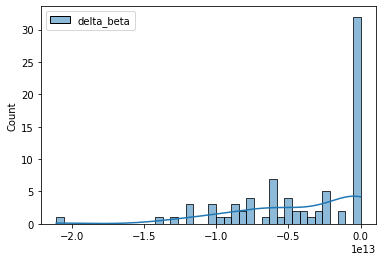

In [35]:
sns.histplot(data=delta_df,bins=40,kde=True)

In [36]:
y_pred_lin = linear_model.predict(X_lin)

<AxesSubplot:ylabel='Count'>

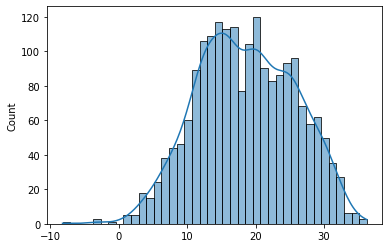

In [37]:
sns.histplot(y_pred_lin,bins=40,kde=True)

In [38]:
# sns.histplot(y,bins=40,kde=True)

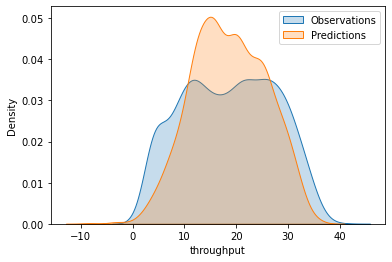

In [39]:
fig,ax = plt.subplots()

sns.kdeplot(y, ax=ax, shade=True, label='Observations')
sns.kdeplot(y_pred_lin, ax=ax,shade=True,label='Predictions')

ax.legend(loc='best')

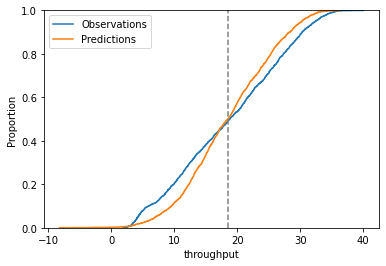

In [40]:
fig,ax = plt.subplots()

sns.ecdfplot(y, ax=ax, label='Observations')
sns.ecdfplot(y_pred_lin, ax=ax,label='Predictions')
plt.axvline(x=y.mean(),color='grey',linestyle='--')

ax.legend(loc='best')

In [41]:
mae = mean_absolute_error(y,y_pred_lin)
mse = mean_squared_error(y,y_pred_lin)
rmse = np.sqrt(mse)

In [42]:
err_df = pd.DataFrame(data=[mae, mse, rmse],index=['MAE','MSE','RMSE'],columns=['LR'])
err_df

,LR
MAE,4.259795
MSE,27.721972
RMSE,5.265166


In [43]:
# y_pred_lin.mean()

In [44]:
# y.describe().drop('count')

In [45]:
err_df.to_csv('./model-err/lin-model-err.csv')

In [46]:
from joblib import dump, load
dump(linear_model, './models/lin-model.joblib')

['./models/lin-model.joblib']

DONE!